In [3]:
# step 1 : importing required libraries

In [178]:
import os
import pandas as pd
import numpy as np

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Step 2 :importing data

In [23]:
df = pd.read_csv("HousingData.csv")

In [27]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [29]:
#step 3 : Exploratory data analysis

In [34]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [54]:
df = df.dropna()

In [55]:
# step 4 : Plotting visualization

In [56]:
plt.style.use('fivethirtyeight') #theme

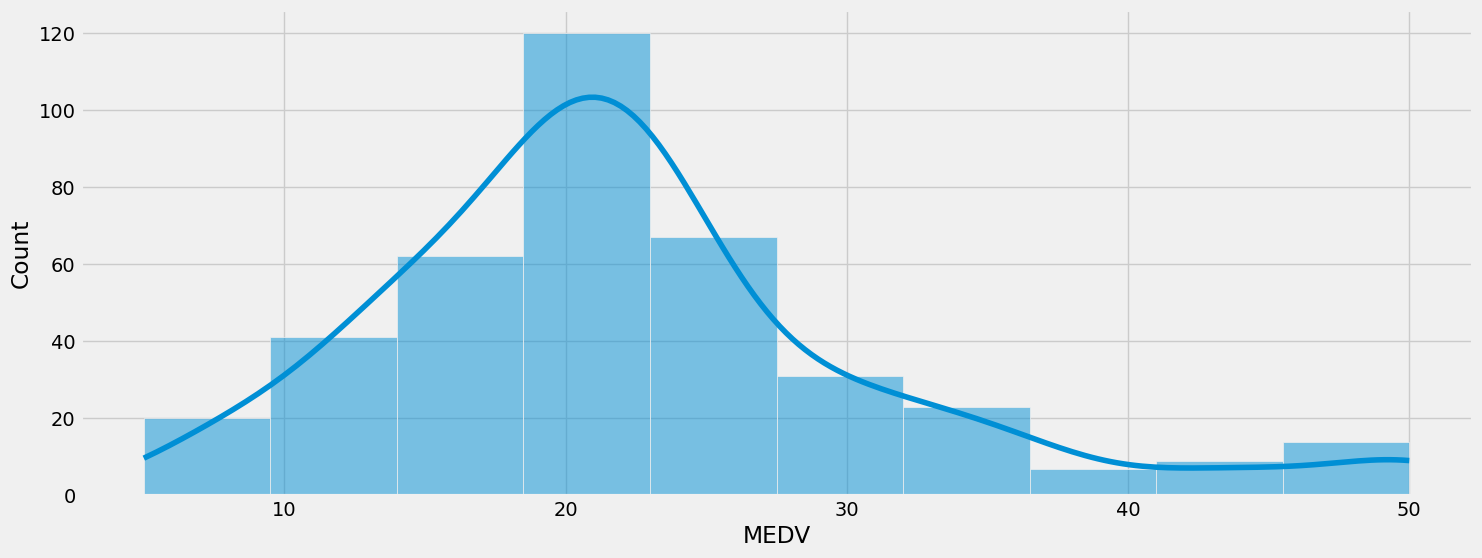

In [57]:
plt.subplots(figsize = (16,6))
sns.histplot(df["MEDV"],bins = 10, kde = True)
plt.show()

In [58]:
df['MEDV'].mean()

22.359644670050763

In [59]:
df[df['MEDV']>45]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5,264,13.0,384.54,7.44,50.0
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5,216,14.9,387.31,3.76,45.4


In [60]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [65]:
sel_col = ["MEDV", 'LSTAT','RM', "TAX"]

<Axes: >

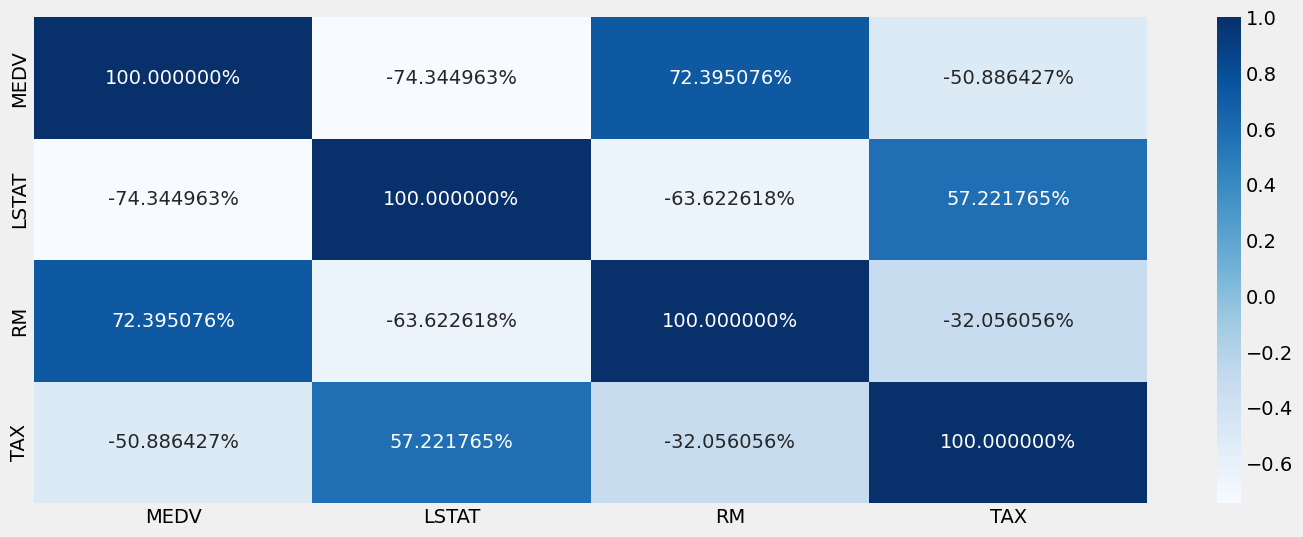

In [66]:
plt.figure(figsize = (16,6))
sns.heatmap(df[sel_col].corr(), cmap = 'Blues', annot = True, fmt = '2%')

In [70]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
mask
mask.shape

(14, 14)

In [87]:
x = df['RM']
type(x)

pandas.core.series.Series

In [88]:
df['RM'].min() #min avg number of room

3.561

In [89]:
df['RM'].max()

8.78

In [90]:
x = np.array(x).reshape(-1,1) #transforming pandas seies to req format

In [91]:
x.ndim

2

In [86]:
y = df['MEDV']
y = np.array(Y).reshape(-1,1)
y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [28.7],
       [27.1],
       [16.5],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [21.2],
       [19.3],
       [20. ],
       [14.4],
       [19.4],
       [19.7],
       [25. ],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19.4],
       [22. ],
       [17.4],
       [20.9],
       [24.2],
       [21.7],
       [22.8],
       [21.4],
       [20. ],
       [20.8],
       [21

In [ ]:
#step 5 : splitiing data for train and test

In [162]:
x_train, x_test,y_train, y_test = train_test_split(df[['RM']],df.MEDV, test_size = 0.10)

In [ ]:
#step 6 : Building linear regression model and testing the accuracy

In [163]:
reg = linear_model.LinearRegression()
reg.fit(df[['RM']],df.MEDV)

LinearRegression()

In [164]:
reg.predict([[8]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38.67044775])

In [167]:
reg.score(x_test, y_test)

0.5449524014252268

Text(0, 0.5, 'House prices')

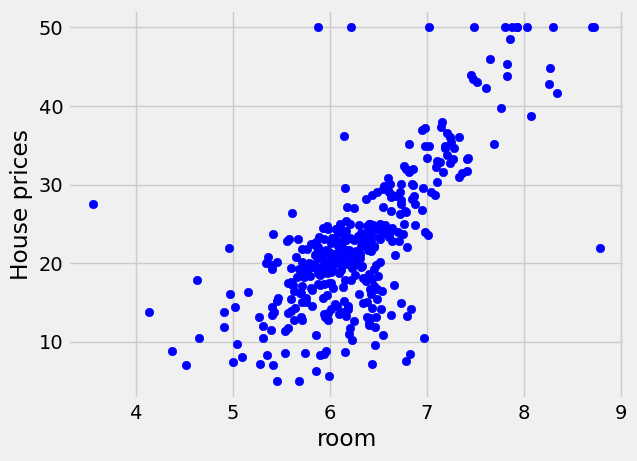

In [126]:
plt.scatter(df['RM'],df['MEDV'], color = 'Blue')
plt.xlabel("room")
plt.ylabel("House prices")

In [127]:
reg.coef_

array([9.48310901])

In [128]:
reg.intercept_

-37.194424311017634

In [129]:
#step 7 : multiple linear regression

In [150]:
reg2 = linear_model.LinearRegression()

In [172]:
x_train,x_test, y_train, y_test = train_test_split(df[['RM', 'LSTAT']],
                                                   df['MEDV'], test_size = 0.2)

In [173]:
reg2.fit(df[['RM','LSTAT']],df.MEDV)

LinearRegression()

In [177]:
reg2.predict([[20,4]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([103.34427778])

In [175]:
reg2.score(x_test, y_test)

0.5618537363340785